In [177]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LIBRARIES FOR MACHINE LEARNING MODELS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix , classification_report,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [178]:
# LOADING DATASET (BASIC INFO)
df=pd.read_csv('accident_prediction_india.csv')

In [179]:
# QUICK LOOK AT DATASET
print("Shape of dataset:",df.shape )

Shape of dataset: (3000, 22)


In [180]:
df.columns

Index(['State Name', 'City Name', 'Year', 'Month', 'Day of Week',
       'Time of Day', 'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities',
       'Weather Conditions', 'Road Type', 'Road Condition',
       'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)',
       'Driver Age', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details'],
      dtype='object')

In [181]:
df.head()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


In [182]:
df.describe()

,Year,Number of Vehicles Involved,Number of Casualties,Number of Fatalities,Speed Limit (km/h),Driver Age
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,2020.530000,2.996000,5.066000,2.455333,74.940667,44.17700
std,1.683858,1.428285,3.214097,1.717650,26.765088,15.40286
min,2018.000000,1.000000,0.000000,0.000000,30.000000,18.00000
25%,2019.000000,2.000000,2.000000,1.000000,51.000000,31.00000
50%,2021.000000,3.000000,5.000000,2.000000,75.000000,45.00000
75%,2022.000000,4.000000,8.000000,4.000000,99.000000,57.00000
max,2023.000000,5.000000,10.000000,5.000000,120.000000,70.00000


In [183]:
# CLEANING THE DATA 

In [184]:
# check for null values
print("MISSING VALUES")
df.isnull().sum().sort_values(ascending=False)

MISSING VALUES


Driver License Status          975
Traffic Control Presence       716
Year                             0
Month                            0
State Name                       0
City Name                        0
Time of Day                      0
Day of Week                      0
Accident Severity                0
Number of Vehicles Involved      0
Number of Fatalities             0
Weather Conditions               0
Vehicle Type Involved            0
Number of Casualties             0
Road Condition                   0
Road Type                        0
Speed Limit (km/h)               0
Lighting Conditions              0
Driver Age                       0
Driver Gender                    0
Alcohol Involvement              0
Accident Location Details        0
dtype: int64

In [185]:
df['Driver License Status'].value_counts()

Driver License Status
Valid      1057
Expired     968
Name: count, dtype: int64

In [186]:
df['Traffic Control Presence'].value_counts()

Traffic Control Presence
Signs               812
Signals             736
Police Checkpost    736
Name: count, dtype: int64

In [187]:
# Marking the null values to Unknown 
df['Driver License Status']=df['Driver License Status'].fillna('Unknown')
df['Traffic Control Presence']=df['Traffic Control Presence'].fillna('Unknown')


In [188]:
# Checking Duplicated rows
print("Duplicated rows:", df.duplicated().sum)

Duplicated rows: <bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool>


In [189]:
df=df[df['Driver Age']>15]

In [190]:
# EXPLORATARY DATA ANALYSIS

In [191]:
# Descriptive Statistics:
df.describe()

,Year,Number of Vehicles Involved,Number of Casualties,Number of Fatalities,Speed Limit (km/h),Driver Age
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,2020.530000,2.996000,5.066000,2.455333,74.940667,44.17700
std,1.683858,1.428285,3.214097,1.717650,26.765088,15.40286
min,2018.000000,1.000000,0.000000,0.000000,30.000000,18.00000
25%,2019.000000,2.000000,2.000000,1.000000,51.000000,31.00000
50%,2021.000000,3.000000,5.000000,2.000000,75.000000,45.00000
75%,2022.000000,4.000000,8.000000,4.000000,99.000000,57.00000
max,2023.000000,5.000000,10.000000,5.000000,120.000000,70.00000


In [192]:
# Checking Accident severity
df['Accident Severity'].value_counts(normalize=True)

Accident Severity
Minor      0.344667
Fatal      0.328333
Serious    0.327000
Name: proportion, dtype: float64

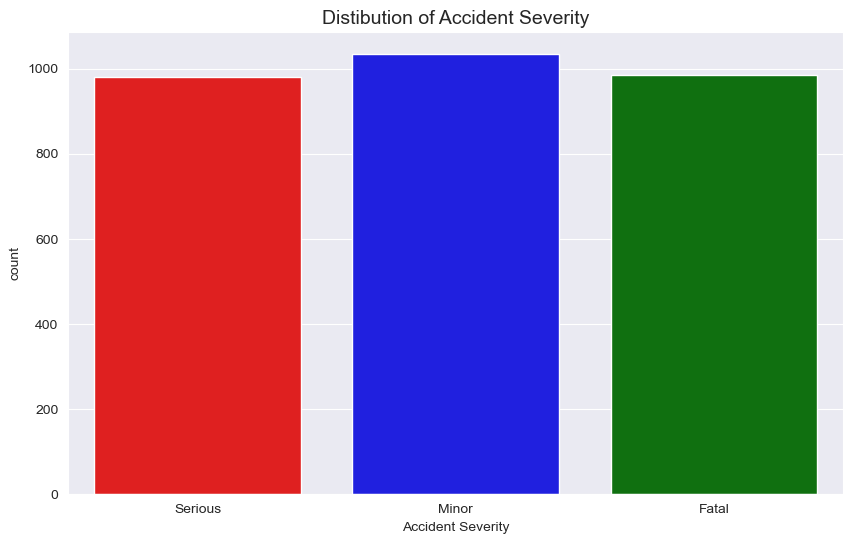

In [193]:
# Making count plot for it
plt.figure(figsize=(10,6))
sns.countplot(x=df['Accident Severity'], palette=['Red','blue','Green'])
plt.title('Distibution of Accident Severity',fontsize=14)
plt.show()

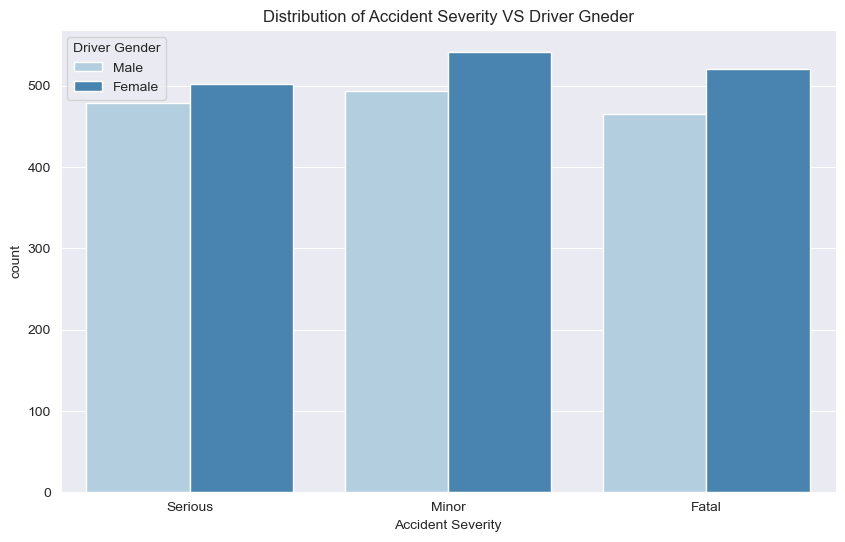

In [194]:
# Checking accident severity w.r.t driver gender
plt.figure(figsize=(10,6))
sns.countplot(x=df['Accident Severity'],hue=df['Driver Gender'],palette ='Blues')
plt.title('Distribution of Accident Severity VS Driver Gneder')
plt.show()

In [195]:
# Lets see the number of unique categories in each column 
cat_features = list(df.select_dtypes(include=object).columns)
for i in cat_features:
    print(f'{i}:{df[i].nunique()}')

State Name:32
City Name:28
Month:12
Day of Week:7
Time of Day:1263
Accident Severity:3
Vehicle Type Involved:7
Weather Conditions:5
Road Type:4
Road Condition:4
Lighting Conditions:4
Traffic Control Presence:4
Driver Gender:2
Driver License Status:3
Alcohol Involvement:2
Accident Location Details:4


In [196]:
# removing time of day because plotting to much data can create a bad impression and also not suggested
cat_columns=cat_features.remove('Time of Day')

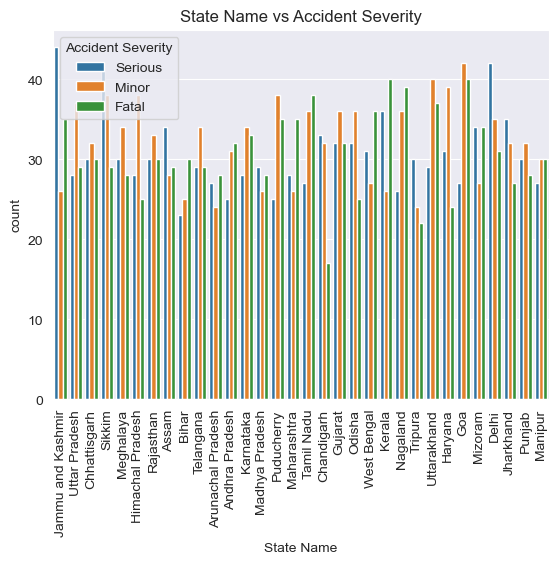

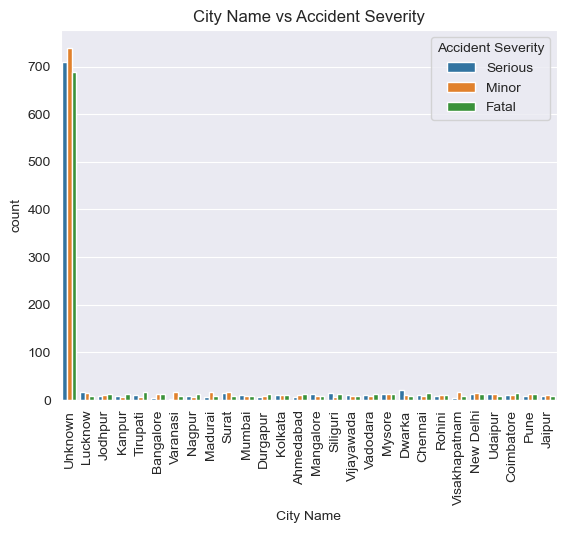

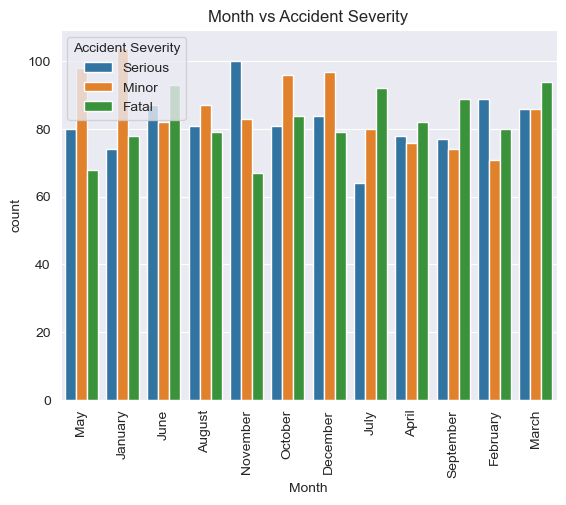

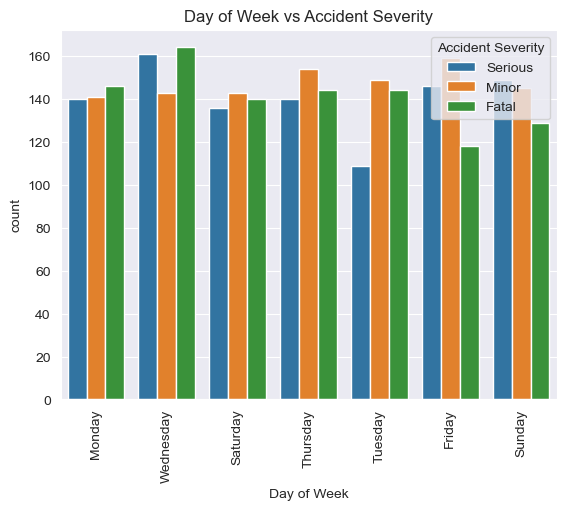

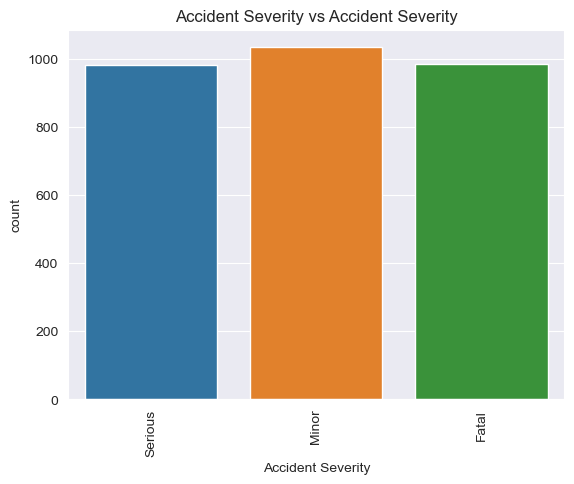

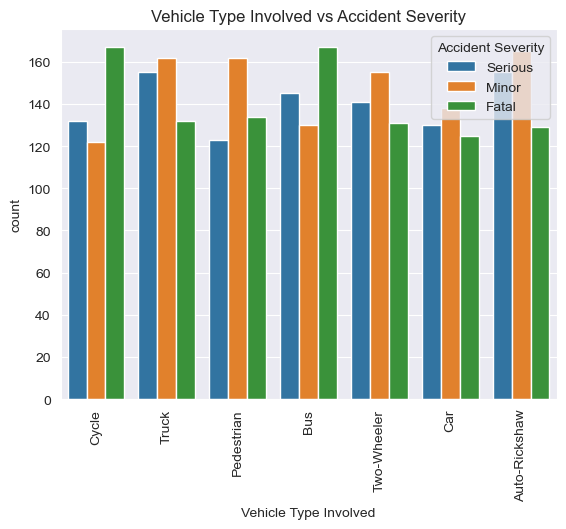

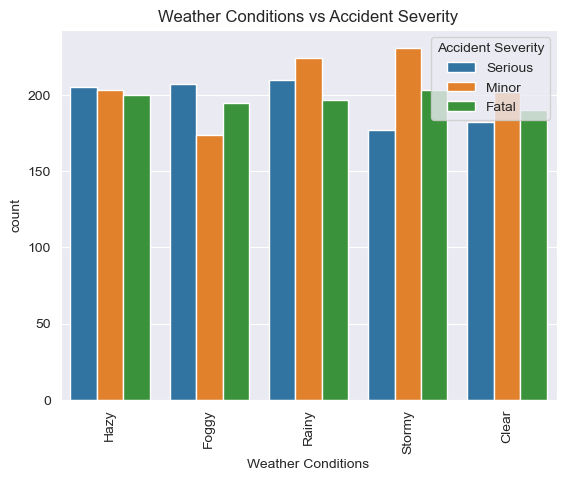

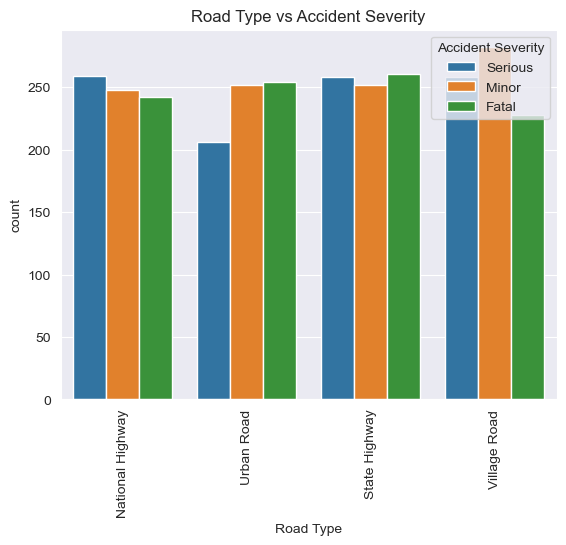

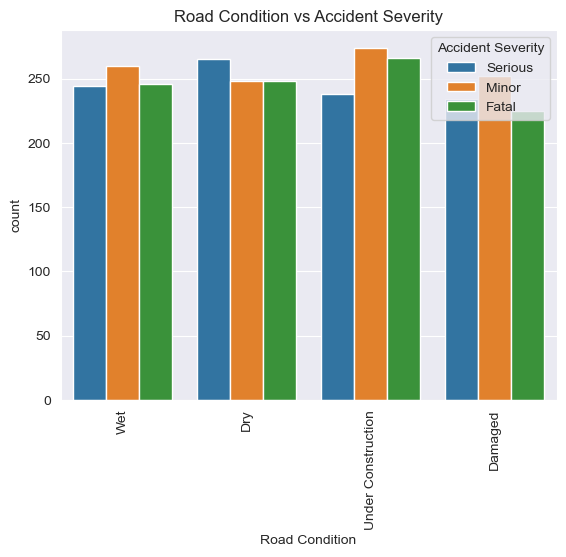

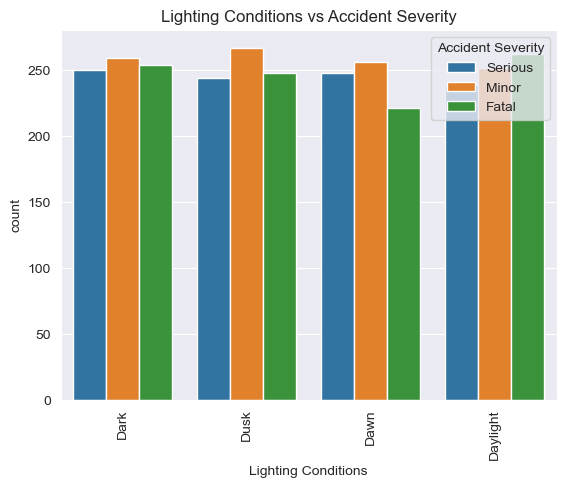

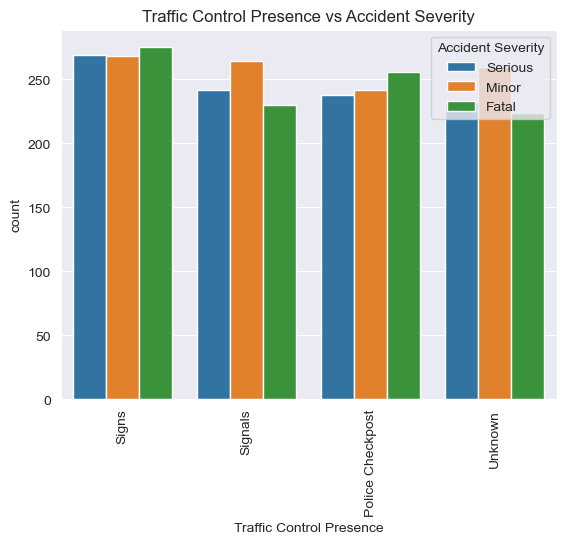

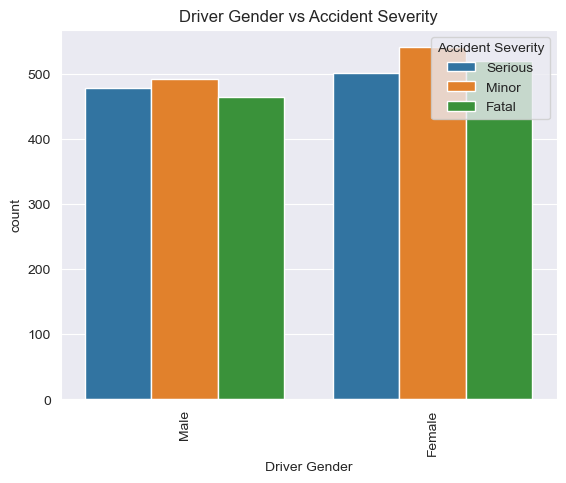

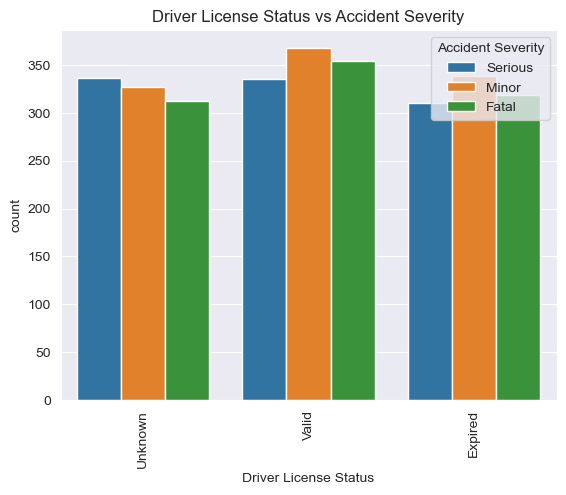

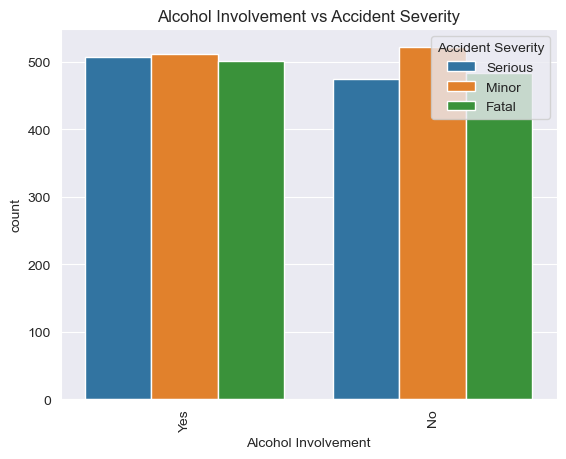

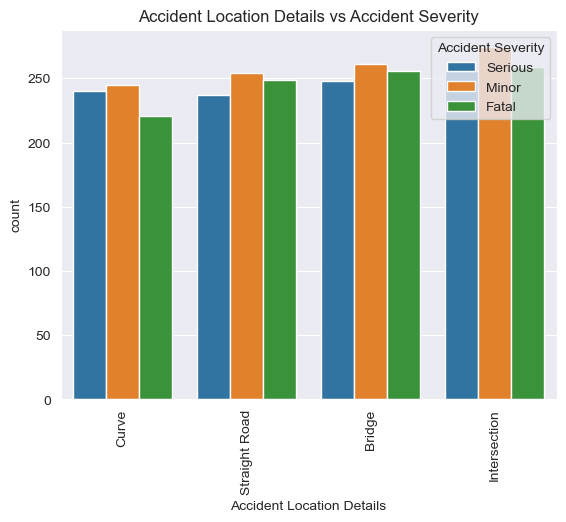

In [197]:
# Plotting Accident Severity VS all the cat_columns
for i in cat_features:
    plt.figure()
    sns.countplot(data=df,x=i,hue='Accident Severity')
    plt.xticks(rotation=90)
    plt.title(f'{i} vs Accident Severity')
plt.show()

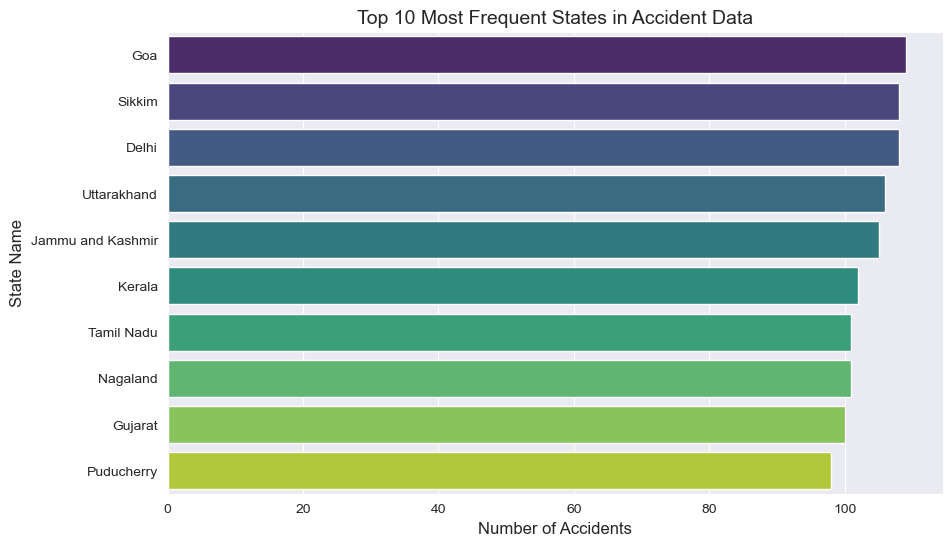

In [198]:
# Getting top 10 most frequent states
top_states = df['State Name'].value_counts().nlargest(10)

# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')

# Adding labels 
plt.title('Top 10 Most Frequent States in Accident Data', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('State Name', fontsize=12)

plt.show()

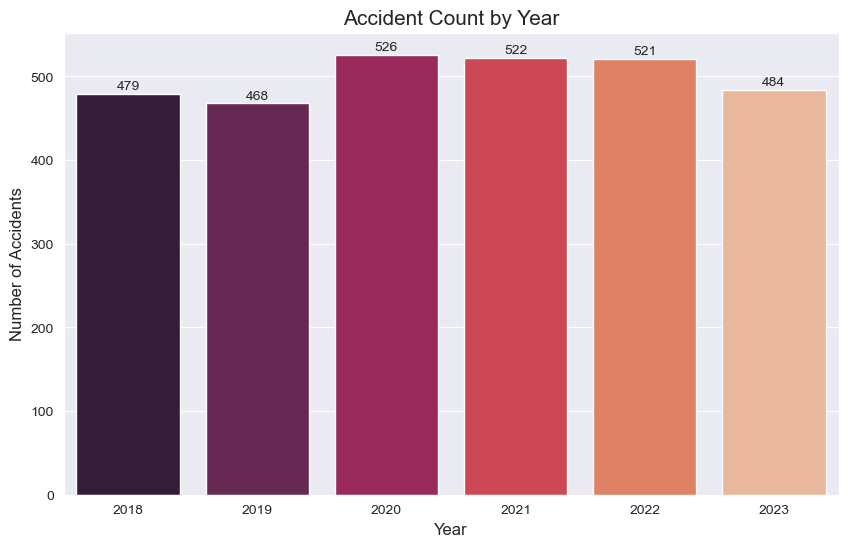

In [199]:
# counting accident per years 
year_count = df['Year'].value_counts().sort_index()

# Convert to DataFrame
year_df = year_count.reset_index()
year_df.columns=['Year', 'Accident Count']

#create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=year_df, x='Year', y='Accident Count',palette='rocket')

# Add title and labels
plt.title('Accident Count by Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Show count labels on top of bars
for index, row in year_df.iterrows():
    plt.text(x=index, y=row['Accident Count']+5, s=row['Accident Count'], ha='center')

plt.show()

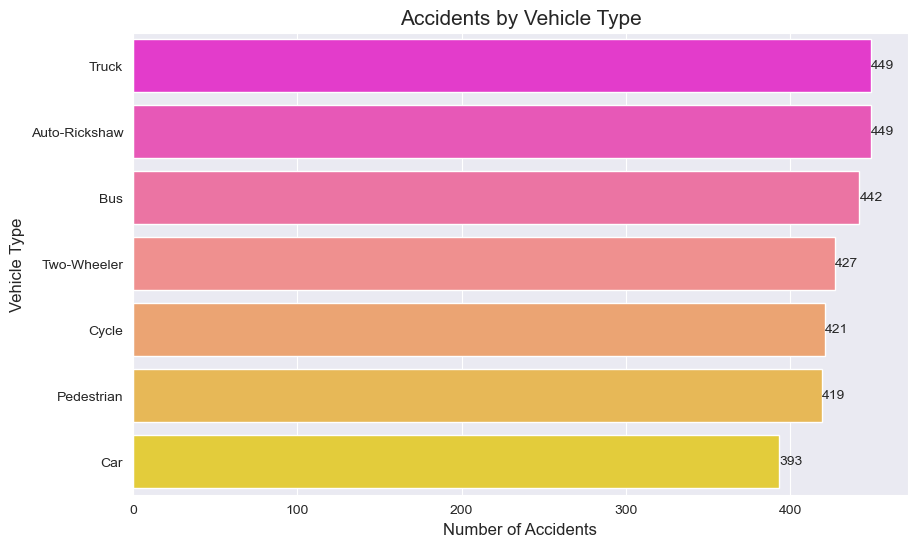

In [200]:
# Count accidents per vehicle type
vehicle_counts = df['Vehicle Type Involved'].value_counts()

# Prepare data for plotting
vehicle_df = vehicle_counts.reset_index()
vehicle_df.columns = ['Vehicle Type', 'Accident Count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=vehicle_df, x='Accident Count', y='Vehicle Type', palette='spring')

# Add titles and labels
plt.title('Accidents by Vehicle Type', fontsize=15)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Vehicle Type', fontsize=12)

# Show count labels on bars
for index, value in enumerate(vehicle_df['Accident Count']):
    plt.text(value, index, str(value), va='center')

plt.show()


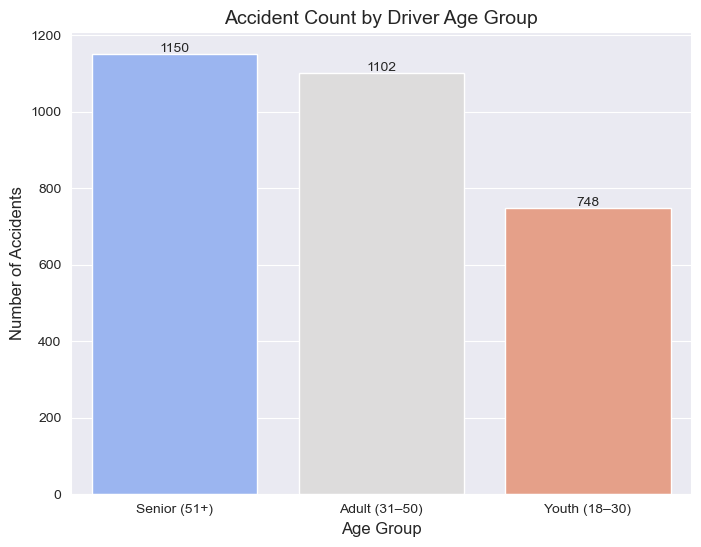

In [201]:
# Categorize driver age
def age_category(age):
    if age <= 30:
        return 'Youth (18–30)'
    elif age <= 50:
        return 'Adult (31–50)'
    else:
        return 'Senior (51+)'

df['Age Group'] = df['Driver Age'].apply(age_category)

# Count accidents per age group
age_group_counts = df['Age Group'].value_counts()

# Convert to DataFrame for plotting
age_df = age_group_counts.reset_index()
age_df.columns = ['Age Group', 'Accident Count']

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(data=age_df, x='Age Group', y='Accident Count', palette='coolwarm')

# Add labels and title
plt.title('Accident Count by Driver Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Show count labels
for index, row in age_df.iterrows():
    plt.text(x=index, y=row['Accident Count']+5, s=row['Accident Count'], ha='center')

plt.show()


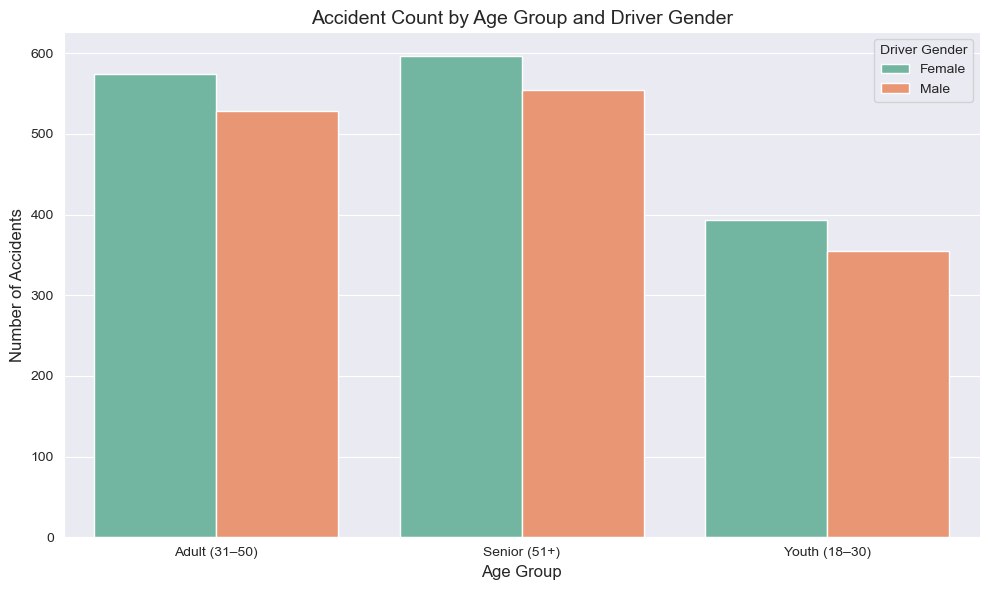

In [202]:
# Categorize driver age into groups
def age_category(age):
    if age <= 30:
        return 'Youth (18–30)'
    elif age <= 50:
        return 'Adult (31–50)'
    else:
        return 'Senior (51+)'

df['Age Group'] = df['Driver Age'].apply(age_category)

# Create a grouped DataFrame: Age Group + Gender
grouped = df.groupby(['Age Group', 'Driver Gender']).size().reset_index(name='Accident Count')

# Plotting grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='Age Group', y='Accident Count', hue='Driver Gender', palette='Set2')

# Add labels and title
plt.title('Accident Count by Age Group and Driver Gender', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(title='Driver Gender')

plt.tight_layout()
plt.show()

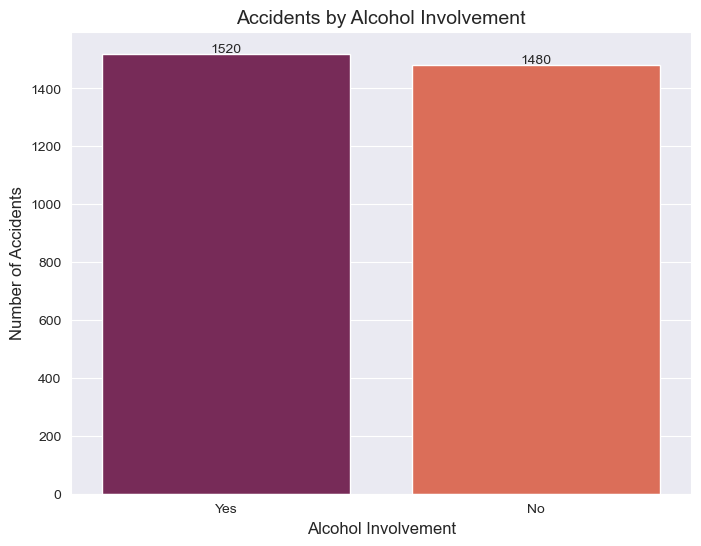

In [203]:
# Count accidents based on alcohol involvement
alcohol_counts = df['Alcohol Involvement'].value_counts()

# Convert to DataFrame for plotting
alcohol_df = alcohol_counts.reset_index()
alcohol_df.columns = ['Alcohol Involvement', 'Accident Count']

# Create the bar plot
plt.figure(figsize=(8,6))
sns.barplot(data=alcohol_df, x='Alcohol Involvement', y='Accident Count', palette='rocket')

# Add labels and title
plt.title('Accidents by Alcohol Involvement', fontsize=14)
plt.xlabel('Alcohol Involvement', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Show count labels on bars
for index, row in alcohol_df.iterrows():
    plt.text(x=index, y=row['Accident Count']+5, s=row['Accident Count'], ha='center')

plt.show()

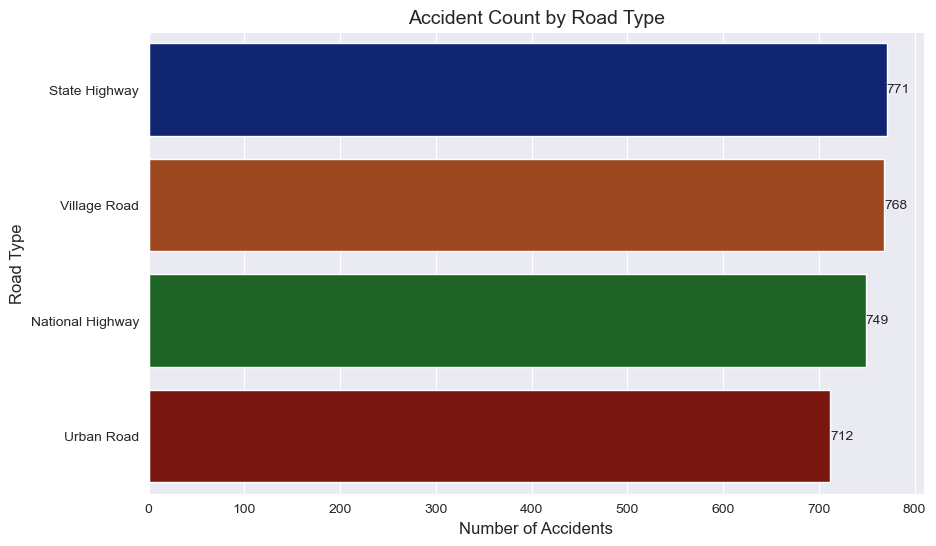

In [204]:
# Count accidents for each road type
road_type_counts = df['Road Type'].value_counts()

# Convert to DataFrame for plotting
road_df = road_type_counts.reset_index()
road_df.columns = ['Road Type', 'Accident Count']

# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=road_df, x='Accident Count', y='Road Type', palette='dark')

# Add labels and title
plt.title('Accident Count by Road Type', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Road Type', fontsize=12)

# Show count labels on bars
for index, value in enumerate(road_df['Accident Count']):
    plt.text(value, index, str(value), va='center')

plt.show()

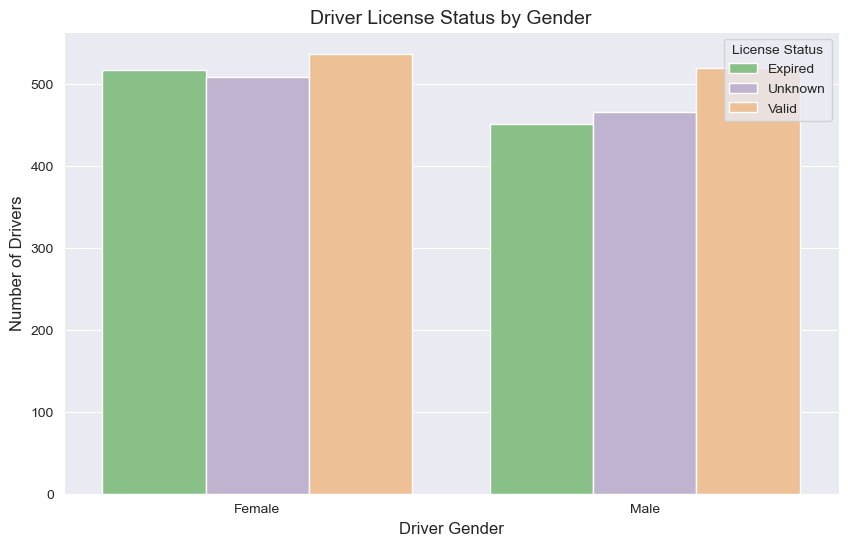

In [205]:
# Drop rows with missing license status if needed
df = df.dropna(subset=['Driver License Status'])

# Group data by Driver Gender and License Status
license_gender = df.groupby(['Driver Gender', 'Driver License Status']).size().reset_index(name='Driver Count')

# Create the grouped bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=license_gender, x='Driver Gender', y='Driver Count', hue='Driver License Status', palette='Accent')

# Add titles and labels
plt.title('Driver License Status by Gender', fontsize=14)
plt.xlabel('Driver Gender', fontsize=12)
plt.ylabel('Number of Drivers', fontsize=12)
plt.legend(title='License Status')

plt.show()

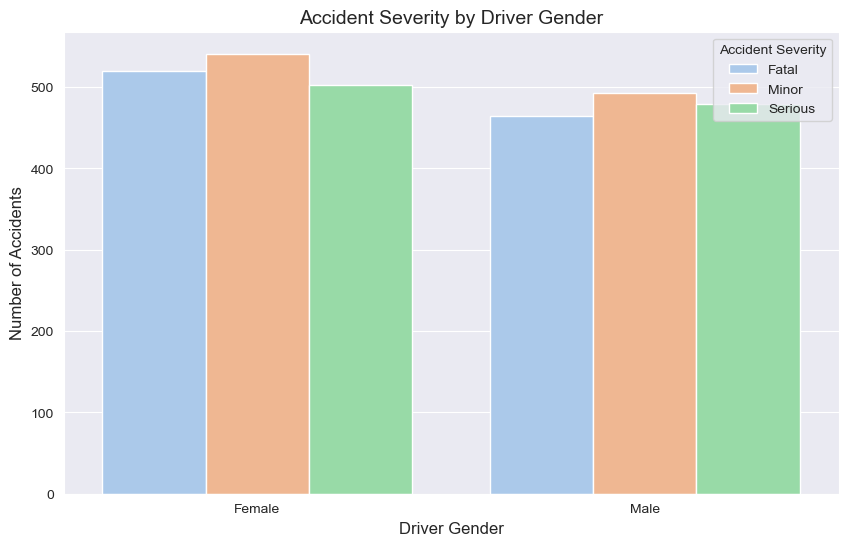

In [206]:
# Group by Driver Gender and Accident Severity
gender_severity = df.groupby(['Driver Gender', 'Accident Severity']).size().reset_index(name='Accident Count')

# Create the grouped bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=gender_severity, x='Driver Gender', y='Accident Count', hue='Accident Severity', palette='pastel')

# Add title and axis labels
plt.title('Accident Severity by Driver Gender', fontsize=14)
plt.xlabel('Driver Gender', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(title='Accident Severity')

plt.show()

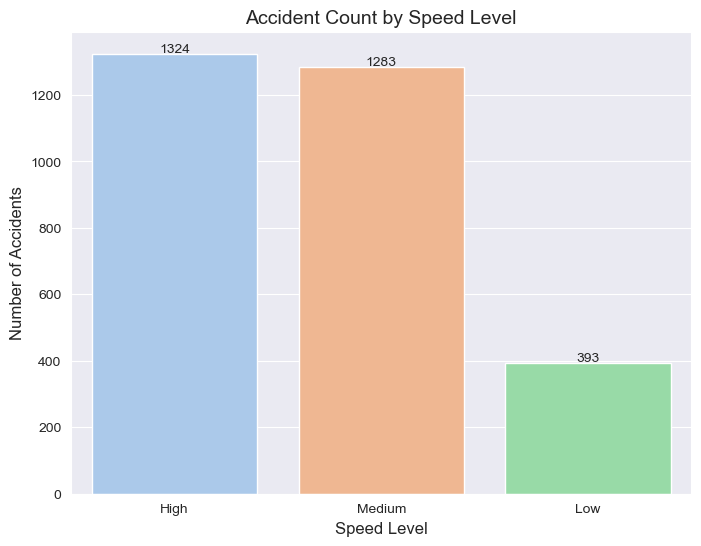

In [207]:
# Categorize speed levels
def classify_speed(speed):
    if speed <= 40:
        return 'Low'
    elif speed <= 80:
        return 'Medium'
    else:
        return 'High'

df['Speed Category'] = df['Speed Limit (km/h)'].apply(classify_speed)

# Count accidents per speed category
speed_counts = df['Speed Category'].value_counts().reset_index()
speed_counts.columns = ['Speed Level', 'Accident Count']

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(data=speed_counts, x='Speed Level', y='Accident Count', palette='pastel')

# Add title and labels
plt.title('Accident Count by Speed Level', fontsize=14)
plt.xlabel('Speed Level', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Show count labels
for index, row in speed_counts.iterrows():
    plt.text(index, row['Accident Count'] + 5, str(row['Accident Count']), ha='center')

plt.show()

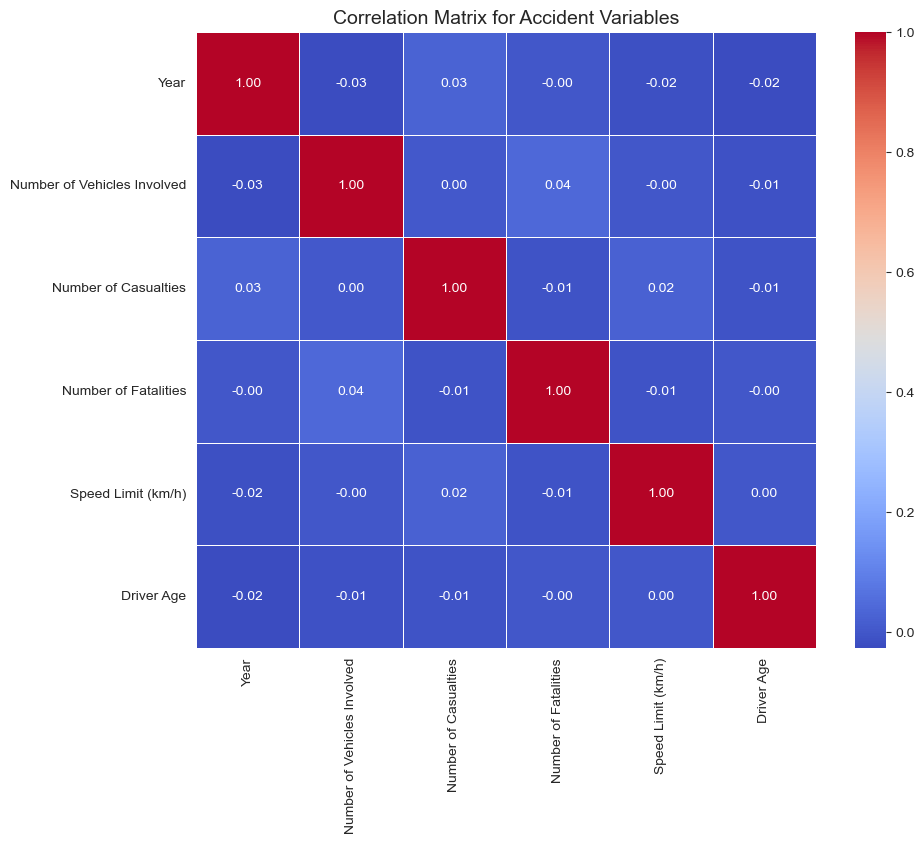

In [208]:
# Select numeric columns for correlation
cols_to_correlate = ['Year', 'Number of Vehicles Involved', 'Number of Casualties',
                     'Number of Fatalities', 'Speed Limit (km/h)', 'Driver Age']

# Compute correlation matrix
correlation_matrix = df[cols_to_correlate].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Matrix for Accident Variables', fontsize=14)

plt.show()

In [209]:
# APPLY MACHINE LEARNING MODELS

In [210]:
# convert categorical into numerical format

le = LabelEncoder()

for col in ['State Name', 'City Name', 'Month', 'Day of Week',
       'Time of Day', 'Accident Severity',
       'Vehicle Type Involved',
       'Weather Conditions', 'Road Type', 'Road Condition',
       'Lighting Conditions', 'Traffic Control Presence',
       'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details']:
    df[col] =  le.fit_transform(df[col])


In [211]:
# Defining X and Y for model 
X = df.drop(columns='Accident Severity')
y = df['Accident Severity']

In [212]:
# TRAINING TESTING SPLITING DATA 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2400, 23)
(2400,)
(600, 23)
(600,)


In [216]:
label_encoder = LabelEncoder()
for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

In [217]:
# Model Building

In [218]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

In [219]:
results = []
for name, model in models.items():
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    score = accuracy_score(y_test, y_preds)
    pre = precision_score(y_test, y_preds, average='macro') 
    
    print(f"\n{name} Performance:")
    print("Accuracy:", score)
    print("Precision Score:", pre)
   
    
    results.append({
        'Model': name,
        'Accuracy': score,
        'Precision': pre
    })
    results_df = pd.DataFrame(results)

print("\nModel Evaluation Summary:")
results_df   
 



Logistic Regression Performance:
Accuracy: 0.33166666666666667
Precision Score: 0.32772010105343435

Random Forest Performance:
Accuracy: 0.33166666666666667
Precision Score: 0.33294806686633194

KNN Performance:
Accuracy: 0.35
Precision Score: 0.35350453614281535

Model Evaluation Summary:


,Model,Accuracy,Precision
0,Logistic Regression,0.331667,0.327720
1,Random Forest,0.331667,0.332948
2,KNN,0.350000,0.353505


In [221]:
# Export results DataFrame to CSV
results_df.to_csv('model_evaluation_results.csv', index=False)

# If you have other relevant data to export:
y_test_df = pd.DataFrame({'actual': y_test, 'predicted': y_preds})
y_test_df.to_csv('model_predictions.csv', index=False)

